# Project:-1 Customer Segmentation.!!

In [3]:
# import modules
import pandas as pd # for dataframes.
import numpy as np
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

## Reading dataset

In [6]:
data = pd.read_excel(r"D:\CustomerSegmentationDataset.xlsx")

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


## Data Cleaning Removing Duplicates & Negative values

In [10]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [11]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4389 entries, 0 to 541768
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4389 non-null   object 
 1   CustomerID  4380 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.7+ KB


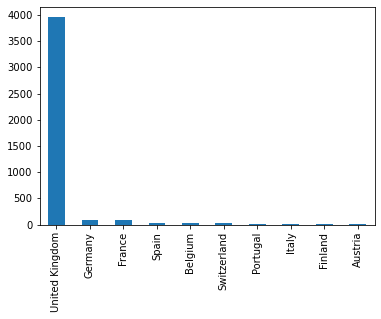

In [12]:
# Top ten Country's Customer
filtered_data.Country.value_counts()[:10].plot(kind='bar') # Bar Charts

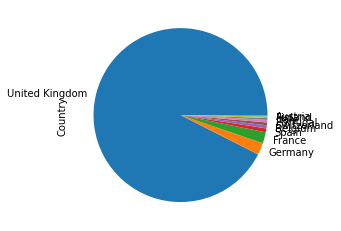

In [13]:
filtered_data.Country.value_counts()[:10].plot(kind='pie') 

In [14]:
uk_data=data[data.Country=='United Kingdom']

In [15]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.5+ MB


In [16]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
# Filter Quality greater than Zero.
uk_data=uk_data[(uk_data['Quantity']>0)]

In [18]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486286 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    486286 non-null  object        
 1   StockCode    486286 non-null  object        
 2   Description  485694 non-null  object        
 3   Quantity     486286 non-null  int64         
 4   InvoiceDate  486286 non-null  datetime64[ns]
 5   UnitPrice    486286 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      486286 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.0+ MB


## Performing K-Means Clustering

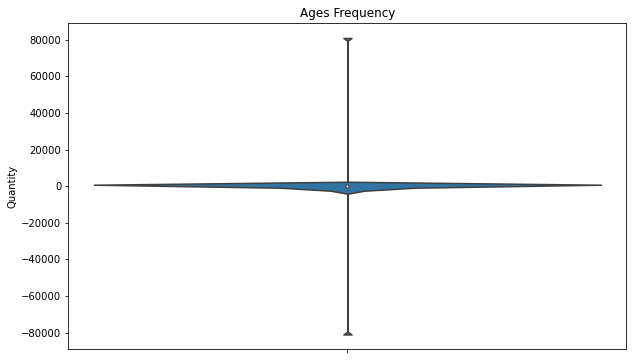

In [36]:
#Agex Frequency

df = pd.read_excel(r"D:\CustomerSegmentationDataset.xlsx")
df.head()
df.drop(["CustomerID"], axis = 1, inplace=True)

plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Quantity"])
plt.show()

## RFM Model Exceuted

In [37]:
# Here, you can filter the necessary columns for RFM analysis. 
#You only need her five columns CustomerID, InvoiceDate, InvoiceNo, 
#Quantity, and UnitPrice. CustomerId will uniquely define your customers, invoiceDate help you calculate recency of purchase, InvoiceNo helps you to count the number of time 
#transaction performed(frequency). Quantity purchased in each transaction and UnitPrice of each unit purchased by the customer will help you to calculate the total purchased amount.#

In [38]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [39]:
uk_data['TotalPrice']=uk_data['Quantity'] * uk_data['UnitPrice']

In [40]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [41]:
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [42]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


## RFM Analysis (Recency, Frequency, Monetary).

In [43]:
rfm = uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [44]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [45]:
# Change the names of columns
rfm.columns=['monetary','frequency','recency']

In [46]:
rfm['recency']=rfm['recency'].astype(int)

In [47]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


## Computing Quantile of RFM values

In [48]:
# Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

rfm['r_quartile'] = pd.qcut(rfm['recency'], 4,['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4,['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4,['4','3','2','1'])

In [49]:
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183,4,4,1
12747.0,2,103,4196,4,1,4
12748.0,0,4596,33719,4,1,4
12749.0,3,199,4090,4,1,4
12820.0,3,59,942,3,2,4


## RFM Result Interpretation

In [50]:
# Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column, this rank will help you to segment the customers well group.
rfm['RFM_Score']= rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)

In [51]:
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183,4,4,1,441
12747.0,2,103,4196,4,1,4,414
12748.0,0,4596,33719,4,1,4,414
12749.0,3,199,4090,4,1,4,414
12820.0,3,59,942,3,2,4,324


In [52]:
# Filter out Top/Best Customers
rfm[rfm['RFM_Score']=='441'].sort_values('monetary',ascending=False).head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
16754.0,372,2,2002,4,4,1,441
12346.0,325,1,77183,4,4,1,441
15749.0,235,10,44534,4,4,1,441
16698.0,226,5,1998,4,4,1,441
13135.0,196,1,3096,4,4,1,441
